# Breast Cancer Detection

### Imported The Relevant packages

In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout,BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam 
import pandas as pd
import cv2 as cv2
import numpy as np 
from matplotlib import pyplot as plt 
import os 
from sklearn.model_selection import train_test_split
import tensorflow as tf

### Download and Explore the dataset 

In [2]:
dataset = r"C:\breast cancer dataset\8863"
Yes_path = r"C:\breast cancer dataset\8863\1"
No_path = r"C:\breast cancer dataset\8863\0"

(50, 50, 3)


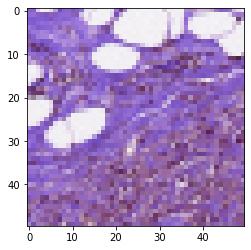

In [3]:
img = cv2.imread(Yes_path+'\\8863_idx5_x1051_y801_class1.png')
print(img.shape)
plt.imshow(img)

In [4]:
vals = [Yes_path, No_path]
print(os.listdir(vals[0]).__len__())
print(os.listdir(vals[1]).__len__())

207
772


In [5]:
pathdir = [Yes_path, No_path]
classes = ['Yes', 'No']
filepaths = []
labels = []
for i, j in zip(pathdir, classes):
    filelist = os.listdir(i)
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())

['8863_idx5_x1001_y1501_class1.png', '8863_idx5_x1001_y1551_class1.png', '8863_idx5_x1001_y1601_class1.png', '8863_idx5_x1001_y801_class1.png', '8863_idx5_x1001_y851_class1.png', '8863_idx5_x1001_y901_class1.png', '8863_idx5_x1001_y951_class1.png', '8863_idx5_x1051_y1001_class1.png', '8863_idx5_x1051_y1051_class1.png', '8863_idx5_x1051_y1101_class1.png', '8863_idx5_x1051_y1151_class1.png', '8863_idx5_x1051_y1501_class1.png', '8863_idx5_x1051_y1551_class1.png', '8863_idx5_x1051_y1601_class1.png', '8863_idx5_x1051_y1651_class1.png', '8863_idx5_x1051_y801_class1.png', '8863_idx5_x1051_y851_class1.png', '8863_idx5_x1051_y901_class1.png', '8863_idx5_x1051_y951_class1.png', '8863_idx5_x1101_y1001_class1.png', '8863_idx5_x1101_y1051_class1.png', '8863_idx5_x1101_y1101_class1.png', '8863_idx5_x1101_y1151_class1.png', '8863_idx5_x1101_y1451_class1.png', '8863_idx5_x1101_y1501_class1.png', '8863_idx5_x1101_y1551_class1.png', '8863_idx5_x1101_y1601_class1.png', '8863_idx5_x1101_y1651_class1.png',

In [6]:
print(filepaths[0:4])
print(labels[0:4])

print(filepaths[-4:])
print(labels[-4:])

['C:\\breast cancer dataset\\8863\\1\\8863_idx5_x1001_y1501_class1.png', 'C:\\breast cancer dataset\\8863\\1\\8863_idx5_x1001_y1551_class1.png', 'C:\\breast cancer dataset\\8863\\1\\8863_idx5_x1001_y1601_class1.png', 'C:\\breast cancer dataset\\8863\\1\\8863_idx5_x1001_y801_class1.png']
['Yes', 'Yes', 'Yes', 'Yes']
['C:\\breast cancer dataset\\8863\\0\\8863_idx5_x951_y801_class0.png', 'C:\\breast cancer dataset\\8863\\0\\8863_idx5_x951_y851_class0.png', 'C:\\breast cancer dataset\\8863\\0\\8863_idx5_x951_y901_class0.png', 'C:\\breast cancer dataset\\8863\\0\\8863_idx5_x951_y951_class0.png']
['No', 'No', 'No', 'No']


In [7]:
dataset = list(zip(filepaths, labels))
pathframe = pd.DataFrame(dataset, columns=['filepaths', 'labels'])

In [8]:
pathframe.__len__()
pathframe.tail()

,filepaths,labels
974,C:\breast cancer dataset\8863\0\8863_idx5_x951...,No
975,C:\breast cancer dataset\8863\0\8863_idx5_x951...,No
976,C:\breast cancer dataset\8863\0\8863_idx5_x951...,No
977,C:\breast cancer dataset\8863\0\8863_idx5_x951...,No
978,C:\breast cancer dataset\8863\0\8863_idx5_x951...,No


In [9]:
print(pathframe['labels'].value_counts())

No     772
Yes    207
Name: labels, dtype: int64


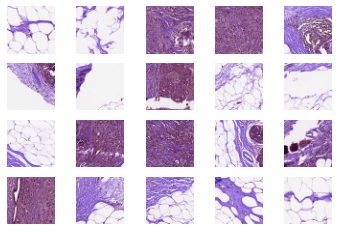

In [10]:
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.imread(pathframe.filepaths[vals]))
    plt.axis('off')
plt.show()

In [11]:
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=0)
Train_new, valid = train_test_split(Train, train_size = 0.90, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(881, 2) (98, 2) (792, 2) (89, 2)


### preprocessing the dataset 

In [12]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range= 40 , width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                  zoom_range=0.2, horizontal_flip = True, vertical_flip= True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [13]:
train_gen = train_datagen.flow_from_dataframe(dataframe = Train_new, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(150,150), class_mode = 'binary', shuffle=True)

valid_gen = train_datagen.flow_from_dataframe(dataframe = valid, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(150,150), class_mode = 'binary', shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe = Test, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(150,150), class_mode = 'binary', shuffle=False)

Found 792 validated image filenames belonging to 2 classes.
Found 89 validated image filenames belonging to 2 classes.
Found 98 validated image filenames belonging to 2 classes.


{'No': 0, 'Yes': 1}
(16, 150, 150, 3)


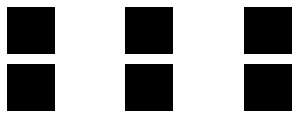

In [16]:
print(train_gen.class_indices)
print(train_gen[0][0].shape)

for i in range(0, 6):
    val = train_gen[0][0][i]
    vals = val.astype('uint8')
    plt.subplot(4,3,i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

In [15]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', input_shape= (150,150,3), include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

219070464/219055592 [==============================] - 61s 0us/step


In [17]:
model.compile(loss='binary_crossentropy', optimizer= Adam(lr=0.01), metrics=['accuracy'])
model.fit(train_gen, validation_data= valid_gen, epochs=10, verbose=1)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
50/50 [==============================] - 301s 6s/step - loss: 0.5131 - accuracy: 0.7487 - val_loss: 16725662030077362176.0000 - val_accuracy: 0.7865
Epoch 2/10
50/50 [==============================] - 278s 6s/step - loss: 0.3323 - accuracy: 0.8346 - val_loss: 179929616.0000 - val_accuracy: 0.2135
Epoch 3/10
50/50 [==============================] - 276s 6s/step - loss: 0.3258 - accuracy: 0.8384 - val_loss: 150587.7656 - val_accuracy: 0.2022
Epoch 4/10
50/50 [==============================] - 276s 6s/step - loss: 0.3193 - accuracy: 0.8447 - val_loss: 992.0717 - val_accuracy: 0.7865
Epoch 5/10
50/50 [==============================] - 270s 5s/step - loss: 0.3114 - accuracy: 0.8750 - val_loss: 33.0931 - val_accuracy: 0.6292
Epoch 6/10
50/50 [==============================] - 299s 6s/step - loss: 0.3087 - accuracy: 0.8763 - val_loss: 1.0512 - val_accuracy: 0.7865
Epoch 7/10
50/50 [==============================] - 294s 6s/step - loss: 0.3373 - accuracy: 0.8346 - val_loss: 4218.580

In [18]:
model.evaluate(test_gen)

7/7 [==============================] - 8s 1s/step - loss: 706.5991 - accuracy: 0.2245


[706.59912109375, 0.22448979318141937]